<a href="https://colab.research.google.com/github/MrSingh6435/Matching-Faces/blob/main/Matching_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets torch torchvision facenet-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB

In [2]:
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image
import requests
import torch
from facenet_pytorch import MTCNN
from scipy.spatial.distance import cosine

# Load the pre-trained model and feature extractor
model_name = 'google/vit-base-patch16-224'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTModel.from_pretrained(model_name)

# Load MTCNN for face detection
mtcnn = MTCNN(keep_all=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
from google.colab import files
uploaded = files.upload()

Saving 20220701_214751653.jpg to 20220701_214751653.jpg


In [15]:
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image
import torch
from facenet_pytorch import MTCNN
from scipy.spatial.distance import cosine

# Load the pre-trained model and feature extractor
model_name = 'google/vit-base-patch16-224'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTModel.from_pretrained(model_name)

# Load MTCNN for face detection
mtcnn = MTCNN(keep_all=True)

# Load the uploaded image
image_path = '/content/20220701_214751653.jpg'  # Update with your image file name
image = Image.open(image_path)

# Detect faces
boxes, _ = mtcnn.detect(image)

# Crop faces from the image
faces = [image.crop(box) for box in boxes]

# Preprocess each face and extract features
face_features = []
for face in faces:
    inputs = feature_extractor(images=face, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    face_features.append(outputs.last_hidden_state[0][0].numpy())


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


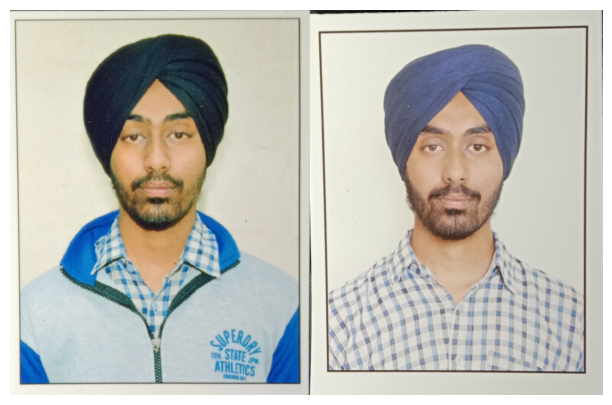

Similarity score between face 1 and known face 1: 0.8513578772544861


In [24]:
def cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)

# Example: Compare with another uploaded image
uploaded = files.upload()  # Upload another image for comparison
# known_image_path = '/content/20220917_192641.jpg'  # Update with your known face image file name
known_image_path = '/content/20220701_214912295.jpg'
known_image = Image.open(known_image_path)

# Detect and extract features of the known face
known_boxes, _ = mtcnn.detect(known_image)
known_faces = [known_image.crop(box) for box in known_boxes]

known_face_features = []
for face in known_faces:
    inputs = feature_extractor(images=face, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    known_face_features.append(outputs.last_hidden_state[0][0].numpy())

# Showing Images
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the images
image1 = cv2.imread(image_path)
image2 = cv2.imread(known_image_path)

# Resize images to the same height for proper concatenation
height1, width1 = image1.shape[:2]
height2, width2 = image2.shape[:2]
if height1 != height2:
    image2 = cv2.resize(image2, (width2 * height1 // height2, height1))

# Concatenate images horizontally
concatenated_image = cv2.hconcat([image1, image2])

# Convert BGR image to RGB (if needed)
concatenated_image_rgb = cv2.cvtColor(concatenated_image, cv2.COLOR_BGR2RGB)

# Display the concatenated image using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(concatenated_image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

# Calculate similarity scores
for i, face in enumerate(face_features):
    for j, known_face in enumerate(known_face_features):
        similarity_score = cosine_similarity(face, known_face)
        print(f'Similarity score between face {i+1} and known face {j+1}: {similarity_score}')

